# Bayesian attribution models

##### Libraries

In [180]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

# Pytorch
import torch
import torch.nn as nn
from torch.autograd import Variable

# Pyro
import pyro
from pyro.distributions import Normal
from pyro.infer import SVI
from pyro.optim import Adam

In [181]:
plt.style.use("ggplot")
plt.rcParams['font.serif'] = 'Ubuntu'
plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['figure.figsize'] = (15,4)
plt.rcParams['grid.color'] = "#d4d4d4"
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 12
plt.rcParams['lines.linewidth'] = 2

# Simulating some data

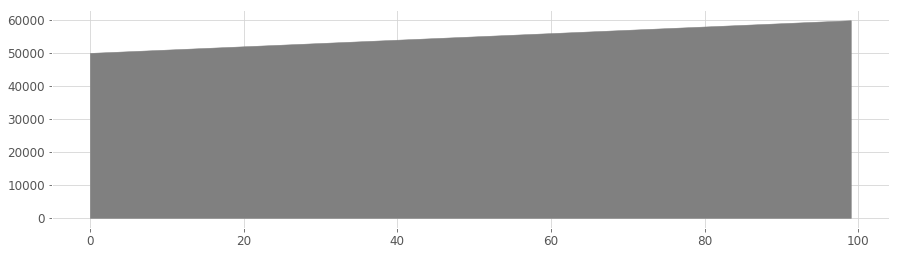

In [182]:
d = np.array(range(100))
base = 50000 + d * 100
plt.stackplot(d,base,color = "grey")
plt.show()

##### Distribution of the first lever : Promotion

In [183]:
support1 = np.linspace(0,14,100)

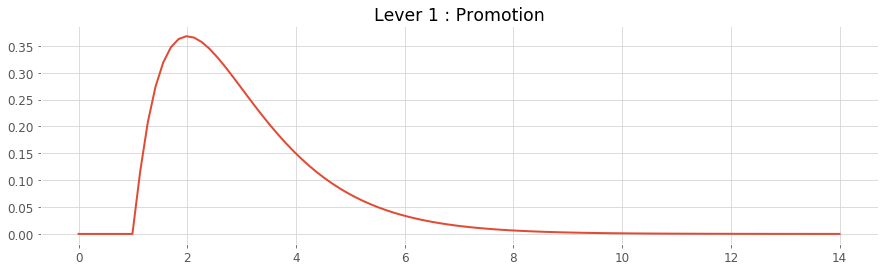

In [184]:
plt.title("Lever 1 : Promotion")
distrib_lever1 = stats.gamma.pdf(support1,2,1)
plt.plot(support1,distrib_lever1)
plt.show()

In [185]:
def generate_promotion(start_date,length,intensity,std_noise = 0,gamma = (2,1)):
    support = np.linspace(0,length,100)
    distribution = stats.gamma.pdf(support,*gamma)
    distribution = np.divide(distribution,np.max(distribution))
    lever = np.zeros(100)
    lever[start_date:start_date+length] = intensity * distribution[::int(100/length)][:length] + np.random.normal(0,std_noise,length)
    return lever

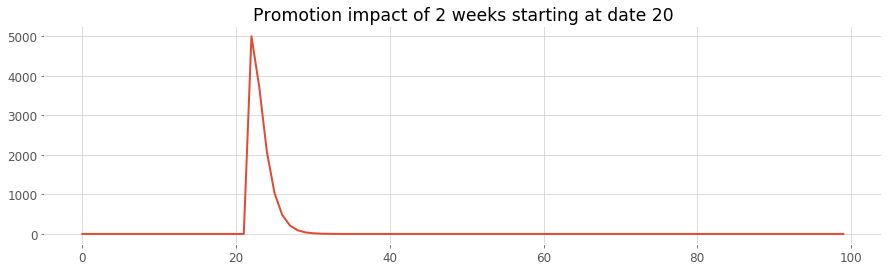

In [186]:
plt.title("Promotion impact of 2 weeks starting at date 20")
plt.plot(generate_promotion(20,14,5000))
plt.show()

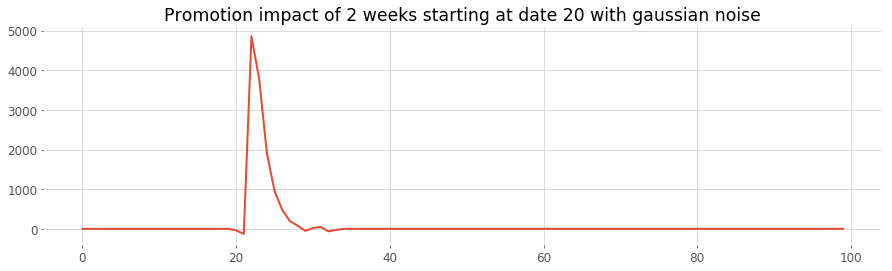

In [187]:
plt.title("Promotion impact of 2 weeks starting at date 20 with gaussian noise")
plt.plot(generate_promotion(20,14,5000,100))
plt.show()

##### Distribution of the second lever : Campaign

In [188]:
support2 = np.linspace(0,60,100)

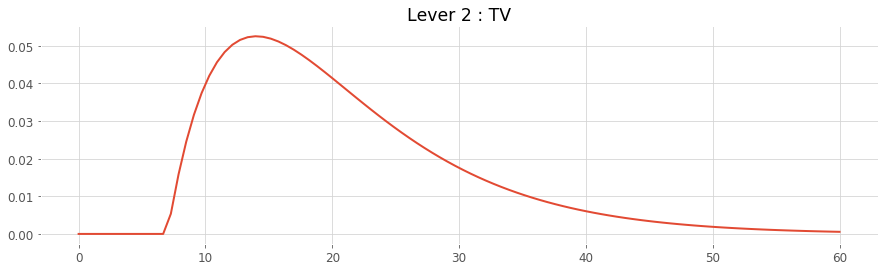

In [189]:
plt.title("Lever 2 : TV")
distrib_lever2 = stats.gamma.pdf(support2,2,7,7)
plt.plot(support2,distrib_lever2)
plt.show()

In [190]:
def generate_campaign(start_date,length,intensity,std_noise = 0,gamma = (2,3,7)):
    support = np.linspace(0,length,100)
    distribution = stats.gamma.pdf(support,*gamma)
    distribution = np.divide(distribution,np.max(distribution))
    lever = np.zeros(100)
    lever[start_date:start_date+length] = intensity * distribution[::int(100/length)][:length] + np.random.normal(0,std_noise,length)
    return lever

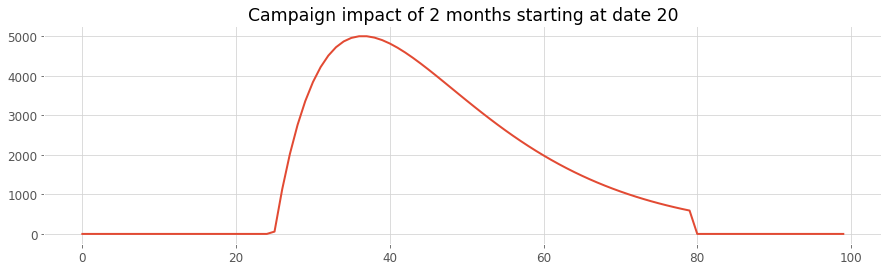

In [191]:
plt.title("Campaign impact of 2 months starting at date 20")
plt.plot(generate_campaign(20,60,5000))
plt.show()

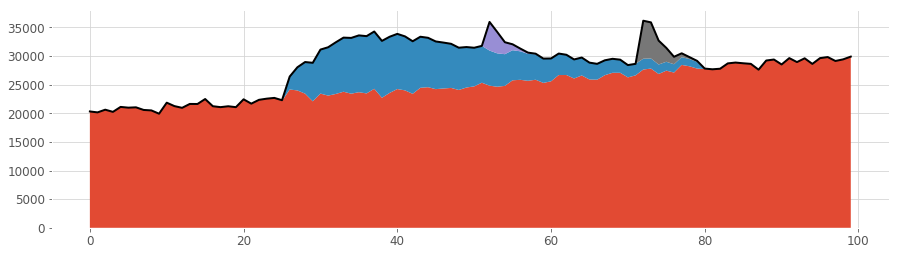

In [195]:
d = np.array(range(100))
base = 20000 + d * 100 + np.random.normal(0,500,100)
campaign1 = generate_campaign(20,60,10000)
promotion1 = generate_promotion(50,14,5000)
promotion2 = generate_promotion(70,21,7000)
sales = base + campaign1 + promotion1 + promotion2
plt.stackplot(d,[base,campaign1,promotion1,promotion2]) #,name = ["base","campaign1","promotion1"])
plt.plot(sales,color = "black")
plt.show()